1. Gerekli kütüphaneler

In [1]:
import pandas as pd
import numpy as np
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

2. Verileri okuma

In [3]:
train_df = pd.read_csv("../datasets/normal/train_mental.csv")
test_df = pd.read_csv("../datasets/normal/test_mental.csv")

X_train = train_df.drop("treatment", axis=1)
y_train = train_df["treatment"]

X_test = test_df.drop("treatment", axis=1)
y_test = test_df["treatment"]

3. Aynı parametrelerle model eğitimi (Lojistik Regresyon)

In [4]:
best_model = LogisticRegression(
    C=0.1, 
    penalty="elasticnet", 
    solver="saga", 
    l1_ratio=0.5, 
    max_iter=10000, 
    class_weight="balanced", 
    random_state=42
)

best_model.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight='balanced', l1_ratio=0.5, max_iter=10000,
                   penalty='elasticnet', random_state=42, solver='saga')

4. Test için performans kontrolü

📋 Sınıflandırma Raporu (Deployment):

              precision    recall  f1-score   support

           0       0.68      0.72      0.70       124
           1       0.71      0.67      0.69       125

    accuracy                           0.69       249
   macro avg       0.70      0.69      0.69       249
weighted avg       0.70      0.69      0.69       249



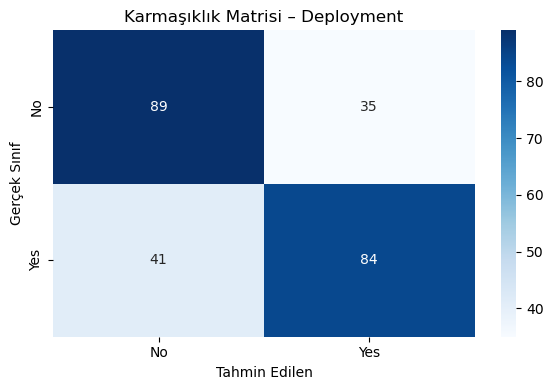

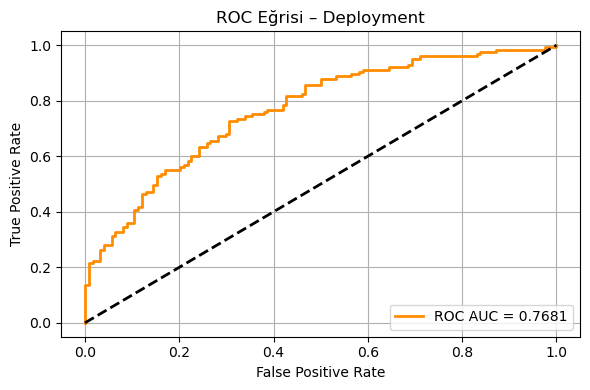

In [5]:
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

print("📋 Sınıflandırma Raporu (Deployment):\n")
print(classification_report(y_test, y_pred))

# Karmaşıklık Matrisi
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title("Karmaşıklık Matrisi – Deployment")
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek Sınıf")
plt.tight_layout()
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.4f}", color="darkorange", lw=2)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title("ROC Eğrisi – Deployment")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

5. Model kaydı

In [6]:
joblib.dump(best_model, "mental_logreg_model.pkl")
print("💾 Model kaydedildi: 'mental_logreg_model.pkl'")

💾 Model kaydedildi: 'mental_logreg_model.pkl'
